In [1]:
import sys
##### sys.path.append('project path') #####
from communication_game.utils.entropy_analysis import *
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import string
from scipy.stats import ttest_ind as ttest

# featurewise effectiveness

In [2]:
entropy_both_biased = get_effectiveness(
    conditions=['default', 'color', 'scale', 'shape', 'all'], mode='basic')
entropy_sender_biased = get_effectiveness(
    conditions=['default', 'color_default', 'scale_default', 'shape_default', 'all_default'], mode='mixed')
entropy_receiver_biased = get_effectiveness(
    conditions=['default', 'default_color', 'default_scale', 'default_shape', 'default_all'], mode='mixed')

In [3]:
all_dataframes = get_effectiveness_dataframes(entropy_both_biased, entropy_sender_biased, entropy_receiver_biased, runs=10)

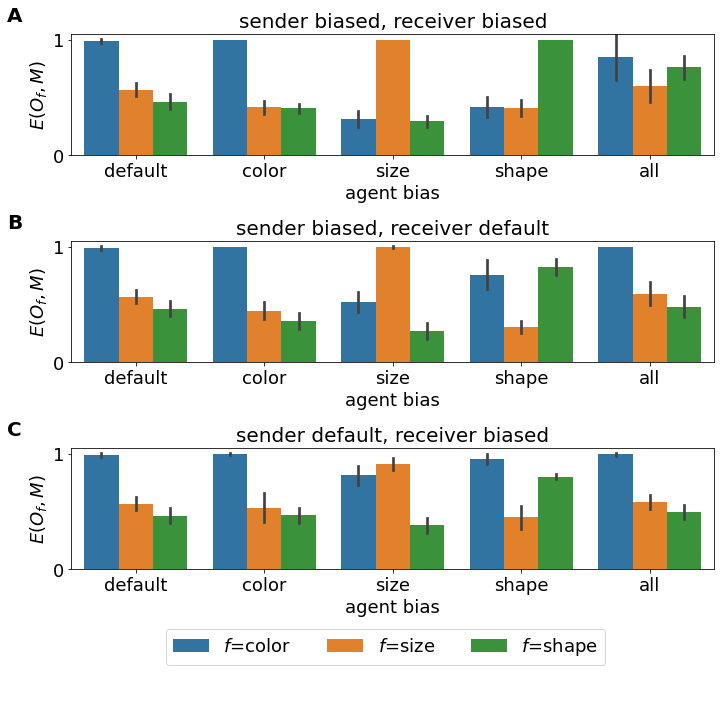

In [4]:
for m, metric in enumerate(['effectiveness']): 
    
    fig = plt.figure(figsize=(10,11))
    for i, df in enumerate(all_dataframes):
        plt.subplot(4,1,i+1)
        ax = sns.barplot(x="bias", y=metric, hue='feature', data=df, ci="sd")
        ax.set_xlabel('')
        lim = [1.05, 1.05, 1.05][m]
        tick = [1.0, 1.0, 1.0][m]
        ax.set_yticks(ticks=[0,tick])
        ax.set_ylim([0.,lim])
        ax.set_ylabel('$E(O_f,M)$', fontsize=18)
        ax.set_xlabel('agent bias', fontsize=18)
        plt.legend([],[], frameon=False)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
        plt.title(['sender biased, receiver biased',
                   'sender biased, receiver default',
                   'sender default, receiver biased'][i], fontsize=20)
        ax.text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, 
                size=20, weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    handles, labels = ax.get_legend_handles_labels()
    legend = fig.legend(handles, ['$f$=' + l for l in labels], loc=[0.23,0.085], ncol=5, fontsize=18)
    legend.get_title().set_fontsize('18')
    plt.tight_layout()
    plt.show()

# average effectiveness across features

In [5]:
# default
print("mean", np.mean(np.mean(entropy_both_biased['default']['effectiveness_scores'][0:3], axis=0)))
print("std", np.std(np.mean(entropy_both_biased['default']['effectiveness_scores'][0:3], axis=0)))

mean 0.6738738551462785
std 0.028400215035652092


In [6]:
# all
print("mean", np.mean(np.mean(entropy_both_biased['all']['effectiveness_scores'][0:3], axis=0)))
print("std", np.std(np.mean(entropy_both_biased['all']['effectiveness_scores'][0:3], axis=0)))

mean 0.7360894873814148
std 0.03724906843166816


In [7]:
# significance 
ttest(np.mean(entropy_both_biased['default']['effectiveness_scores'][0:3], axis=0), 
      np.mean(entropy_both_biased['all']['effectiveness_scores'][0:3], axis=0))

Ttest_indResult(statistic=-3.9847033757185, pvalue=0.0008689359090615216)

# residual entropy

In [6]:
re = get_residual_entropy()

In [11]:
# default condition
print("mean", np.mean(re['default']))
print("std", np.std(re['default']))

mean 0.7726869280554673
std 0.023291876539716608


In [13]:
# all condition
print("mean", np.mean(re['all']))
print("std", np.std(re['all']))

mean 0.7521421567198682
std 0.027655780543064595


In [14]:
ttest(re['default'], re['all'])

Ttest_indResult(statistic=1.7046138578290626, pvalue=0.10546581782621564)